# Проверка гипотез для увеличения выручки в интернет-магазине

Задача:  

    Необходимо провести приоритизацию гипотез для увеличения выручки крупного интернет-магазина, после чего проанализировать результаты проведенного A/B теста.

Имеющиеся данные:
* файл с гипотезами;
* файл с результатами A/B теста, содержащий данные о заказах;
* файл с результатами A/B теста, содержащий данные о посетителях интернет-магазина.

### План работ
1. [Шаг 1. Приоритизация гипотез](#step1)  
    1.1 [Приоритизация по системе ICE](#step1.1)  
    1.2 [Приоритизация по системе RICE](#step1.2)  
    1.3 [Вывод](#step1.3)  
2. [Шаг 2. Анализ A/B-теста](#step2)  
    2.1 [Предобработка данных](#step2.1)    
    2.2 [Графики кумулятивных метрик](#step2.2)  
    2.3 [Определение аномалий](#step2.3)  
    2.4 [Проверка гипотез по "сырым" данным](#step2.4)  
    2.5 [Проверка гипотез по "очищенным" данным](#step2.5)  
    2.6 [Вывод](#step2.6)  

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

<a id='step1'></a>
## Шаг 1. Приоритизация гипотез

In [2]:
# Таблица с гипотезами и их оценками по системе ICE / RICE
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

<a id='step1.1'></a>
### Приоритизация по системе ICE

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [5]:
# Расчет параметра ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [6]:
# Настройка для просмотра полного текста гипотезы
pd.options.display.max_colwidth = 150

In [7]:
# Приоритизированные гипотезы по параметру ICE
hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False).set_index(np.arange(0, len(hypothesis)))

,hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


<a id='step1.2'></a>
### Приоритизация по системе RICE

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [8]:
# Расчет параметра RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [9]:
a = range(3, 6)

In [10]:
np.arange(0, len(hypothesis))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
# Приоритизированные гипотезы по параметру RICE
hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False).set_index(np.arange(0, len(hypothesis)))

,hypothesis,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<a id='step1.3'></a>
### Вывод

По рассчитаному значению параметра **ICE**, наиболее перспективной является гипотеза _"Запустить акцию, дающую скидку на товар в день рождения"_ , также ТОП3 попадают гипотезы: _"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"_ и _"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"_.   

По рассчитаному значению параметра **RICE**, наиболее перспективной является гипотеза _"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"_ , в ТОП3 также попадают гипотезы _"Добавить блоки рекомендаций товаров на сайт интернет магазина"_ и _"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"_

Как видно, приоритизация гипотез по RICE и ICE отличаются, только одна гипотеза присутствует в двух ТОП3: _"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"_ . Вероятно, именно на ней стоит в первую очередь сфокусировать внимание.   
При проведении приоритизации по RICE лидирующая в ICE гипотеза об акциях в день рождения клиента попала на пятое место, что объясняется тем, что в RICE учитывается охват пользователей, а акции в день рождения охватят далеко не всех пользователей. В то время как лидирующая (с сильным отрывом) гипотеза по RICE о добавлении формы подписки охватывает всех пользователей магазина.

В чем сходятся проведенные приоритизации по RICE и ICE - это 4 наименее успешных гипотезы, на которые в данный момент не стоит тратить силы:
* _"Запустить собственную службу доставки, что сократит срок доставки заказов"_
* _"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"_
* _"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"_
* _"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"_

<a id='step2'></a>
## Шаг 2. Анализ A/B-теста

<a id='step2.1'></a>
### Предобработка данных

In [12]:
# Загрузка результатов A/B-теста
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [13]:
# Таблица с результатами A/B теста, содержащий данные о заказах 
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
# Корректировка названий столбцов
orders.rename(columns={'transactionId':'transaction_id', 
                       'visitorId':'visitor_id'}, inplace=True)

In [15]:
# Проверка данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null object
revenue           1197 non-null int64
group             1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
# Преобразование значений в столбце date в тип данных datetime64
orders['date'] = pd.to_datetime(orders['date'])

In [17]:
# Проверка
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
# Проверка диапазона дат
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [19]:
# Таблица с результатами A/B теста, содержащий данные о посетителях интернет-магазина
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [20]:
# Проверка данных
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
# Преобразование значений в столбце date в тип данных datetime64
visitors['date'] = pd.to_datetime(visitors['date'])

In [22]:
# Проверка
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [23]:
# Проверка диапазона дат
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

**Вывод**:  
Данные чистые и приведены к нужным типам. Диапазоны дат в таблицах с заказами и посещениями совпадают.

<a id='step2.2'></a>
### Кумулятивные метрики

#### Расчеты для группы А

In [24]:
# Ежедневные заказы для группы А
daily_orders_A = orders[orders['group']=='A'].groupby('date', as_index=False)\
    .agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})

In [25]:
# Переименования столбцов
daily_orders_A.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

In [26]:
# Ежедневные заказы для группы А
daily_orders_A.head()

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [27]:
# Расчет кумулятивных заказов
daily_orders_A['cummulative_orders_A'] = daily_orders_A['orders_per_date_A'].cumsum()

In [28]:
# Расчет кумулятивной выручки 
daily_orders_A['cummulative_revenue_A'] = daily_orders_A['revenue_per_date_A'].cumsum()

In [29]:
daily_orders_A.head()

,date,orders_per_date_A,revenue_per_date_A,cummulative_orders_A,cummulative_revenue_A
0,2019-08-01,24,148579,24,148579
1,2019-08-02,20,93822,44,242401
2,2019-08-03,24,112473,68,354874
3,2019-08-04,16,70825,84,425699
4,2019-08-05,25,124218,109,549917


In [30]:
# Ежедневные посетители для группы А
daily_visitors_A = visitors[visitors['group']=='A'][['date', 'visitors']]

In [31]:
# Переименование столбца
daily_visitors_A.rename(columns={'visitors':'visitors_per_date_A'}, inplace=True)

In [32]:
# Кумулятивные посетители для группы А
daily_visitors_A['cummulative_visitors_A'] = daily_visitors_A['visitors_per_date_A'].cumsum()

In [33]:
daily_visitors_A.head()

,date,visitors_per_date_A,cummulative_visitors_A
0,2019-08-01,719,719
1,2019-08-02,619,1338
2,2019-08-03,507,1845
3,2019-08-04,717,2562
4,2019-08-05,756,3318


In [34]:
# Проверка длины столбцов
len(daily_visitors_A), len(daily_orders_A)

(31, 31)

In [35]:
# Объединение данных по группе А
group_data_A = daily_visitors_A.merge(daily_orders_A, on = 'date')

In [36]:
# Объединенная таблица с метриками по группе А
group_data_A.head()

,date,visitors_per_date_A,cummulative_visitors_A,orders_per_date_A,revenue_per_date_A,cummulative_orders_A,cummulative_revenue_A
0,2019-08-01,719,719,24,148579,24,148579
1,2019-08-02,619,1338,20,93822,44,242401
2,2019-08-03,507,1845,24,112473,68,354874
3,2019-08-04,717,2562,16,70825,84,425699
4,2019-08-05,756,3318,25,124218,109,549917


In [37]:
# Длина таблицы
len(group_data_A)

31

#### Расчеты для группы B

In [38]:
# Ежедневные заказы для группы B
daily_orders_B = orders[orders['group']=='B'].groupby('date', as_index=False)\
    .agg({'transaction_id' : 'nunique', 'revenue' : 'sum'})

In [39]:
# Переименования столбцов
daily_orders_B.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

In [40]:
# Ежедневные заказы для группы А
daily_orders_B.head()

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [41]:
# Расчет кумулятивных заказов
daily_orders_B['cummulative_orders_B'] = daily_orders_B['orders_per_date_B'].cumsum()

In [42]:
# Расчет кумулятивной выручки 
daily_orders_B['cummulative_revenue_B'] = daily_orders_B['revenue_per_date_B'].cumsum()

In [43]:
daily_orders_B.head()

,date,orders_per_date_B,revenue_per_date_B,cummulative_orders_B,cummulative_revenue_B
0,2019-08-01,21,101217,21,101217
1,2019-08-02,24,165531,45,266748
2,2019-08-03,16,114248,61,380996
3,2019-08-04,17,108571,78,489567
4,2019-08-05,23,92428,101,581995


In [44]:
# Ежедневные посетители для группы B
daily_visitors_B = visitors[visitors['group']=='B'][['date', 'visitors']]

In [45]:
# Переименование столбца
daily_visitors_B.rename(columns={'visitors':'visitors_per_date_B'}, inplace=True)

In [46]:
# Кумулятивные посетители для группы B
daily_visitors_B['cummulative_visitors_B'] = daily_visitors_B['visitors_per_date_B'].cumsum()

In [47]:
daily_visitors_B.head()

,date,visitors_per_date_B,cummulative_visitors_B
31,2019-08-01,713,713
32,2019-08-02,581,1294
33,2019-08-03,509,1803
34,2019-08-04,770,2573
35,2019-08-05,707,3280


In [48]:
# Объединение данных по группе А
group_data_B = daily_visitors_B.merge(daily_orders_B, on = 'date')

In [49]:
# Объединенная таблица с метриками по группе B
group_data_B.head()

,date,visitors_per_date_B,cummulative_visitors_B,orders_per_date_B,revenue_per_date_B,cummulative_orders_B,cummulative_revenue_B
0,2019-08-01,713,713,21,101217,21,101217
1,2019-08-02,581,1294,24,165531,45,266748
2,2019-08-03,509,1803,16,114248,61,380996
3,2019-08-04,770,2573,17,108571,78,489567
4,2019-08-05,707,3280,23,92428,101,581995


#### График кумулятивной выручки по группам

C:\Users\asfil\anaconda3\envs\practicum\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


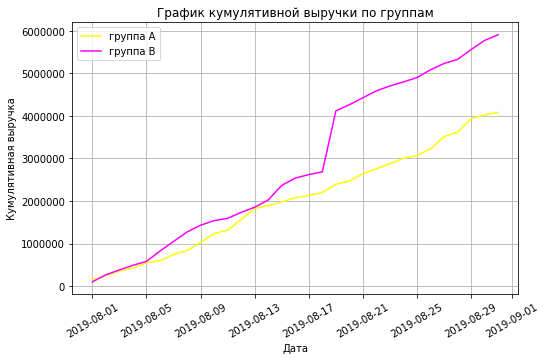

In [50]:
# Построение графика

plt.figure(figsize=(8, 5))
cmap = plt.cm.spring

plt.plot(group_data_A['date'], group_data_A['cummulative_revenue_A'], label='группа A', color = cmap(1.))
plt.plot(group_data_B['date'], group_data_B['cummulative_revenue_B'], label='группа B', color = cmap(0.))

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.grid()
plt.show()

По графику кумулятивной выручки можно отметить, что в начале месяца выручка практически равномерно увеличивалась для обеих групп, однако после 18 числа (с середины месяца) виден резкий скачок в выручки для группы B.

#### График кумулятивного среднего чека по группам

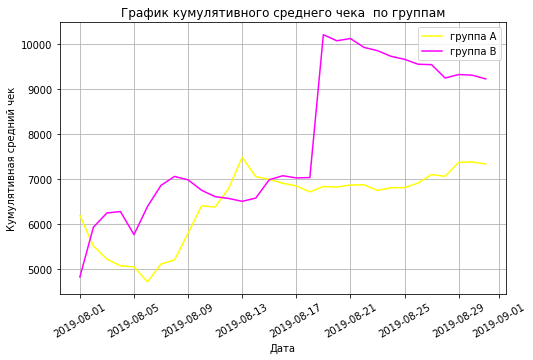

In [51]:
# Построение графика

plt.figure(figsize=(8, 5))

plt.plot(group_data_A['date'], 
         group_data_A['cummulative_revenue_A']/group_data_A['cummulative_orders_A'], 
         label='группа A',
         color = cmap(1.))
plt.plot(group_data_B['date'],
         group_data_B['cummulative_revenue_B']/group_data_B['cummulative_orders_B'],
         label='группа B',
         color = cmap(0.))
plt.title('График кумулятивного среднего чека  по группам')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.ylabel('Кумулятивная средний чек')
plt.legend()
plt.grid()
plt.show()

На графике кумулятивного средчнего чека для группы B опять наблюдается резкий прирост в кумулятивном среднем чеке 19 числа. Возможно, на этот день пришелся какой-то крупный заказ (или несколько крупных), который исказил данные и сделал перевес в среднем чеке для группы B. К концу периода заметна стабилизация среднего чека для группы А, в то время как для группы B средний чек постепенно начинает снижаться.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

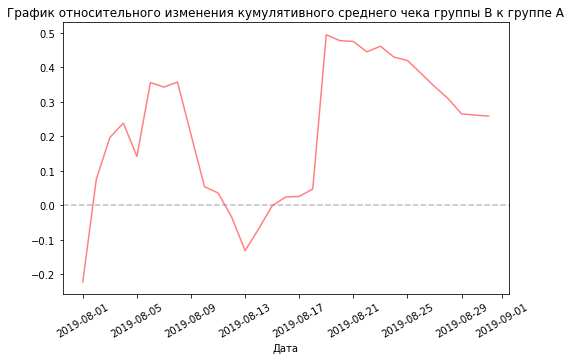

In [52]:
# Построение графика
plt.figure(figsize=(8, 5))

plt.plot(group_data_B['date'],
         (group_data_B['cummulative_revenue_B']/group_data_B['cummulative_orders_B'])/
         (group_data_A['cummulative_revenue_A']/group_data_A['cummulative_orders_A'])-1, color = cmap(.5))

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.axhline(y=0, color='grey', linestyle='--', alpha = .5) 
plt.show()

На данном графике также виден скачок в среднем чеке 19 числа, скорее всего, действительно сказывается влияние выбросов. В конце месяца наблюдается стабильное снижение относительного изменения кумулятивного среднего чека группы B к группе A.

#### График кумулятивной конверсии по группам

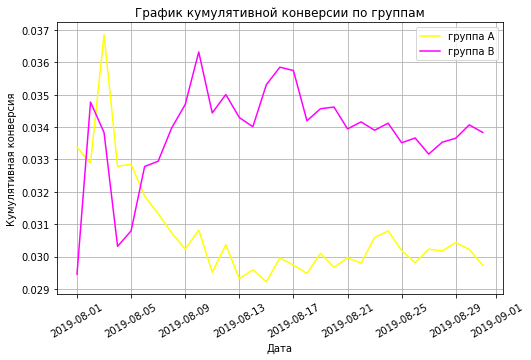

In [53]:
# Построение графика

plt.figure(figsize=(8, 5))

plt.plot(group_data_A['date'], 
         group_data_A['cummulative_orders_A']/group_data_A['cummulative_visitors_A'], 
         label='группа A',
         color = cmap(1.))
plt.plot(group_data_B['date'],
         group_data_B['cummulative_orders_B']/group_data_B['cummulative_visitors_B'],
         label='группа B',
         color = cmap(0.))
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.ylabel('Кумулятивная конверсия')
plt.legend()
plt.grid()
plt.show()

В начале графика видны сильные колебания кумулятивных конверсий, однако начиная с 17 числа колебания снизились и, вероятно, установились около средней конверсии по группе, в итоге кумулятивная конверсия группы B относительно стабильно выше конверсии группы A.

#### График относительного изменения кумулятивной конверсии группы B к группе A

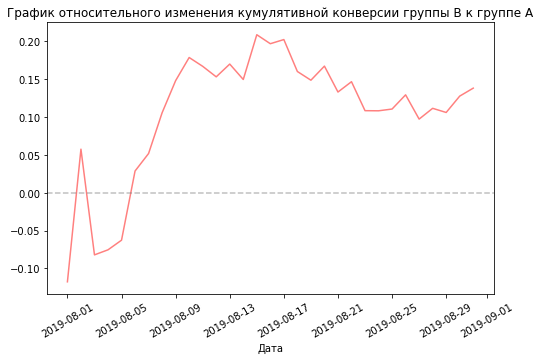

In [54]:
# Построение графика
plt.figure(figsize=(8, 5))

plt.plot(group_data_B['date'],
         (group_data_B['cummulative_orders_B']/group_data_B['cummulative_visitors_B'])/
         (group_data_A['cummulative_orders_A']/group_data_A['cummulative_visitors_A'])-1, color = cmap(.5))

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.axhline(y=0, color='grey', linestyle='--', alpha = .5) 
plt.show()

Согласно графику, можно отметить, что после колебаний кумулятивная конверсия группы B больше конверсии группы A. Но все же к концу периоду можно отметить снижение относительного изменения группы B.

<a id='step2.3'></a>
### Определение аномалий

#### Распределение количества заказов по пользователям

In [55]:
# Подсчет количества заказов по пользователям
orders_by_users = orders.groupby('visitor_id')['transaction_id'].nunique().reset_index()

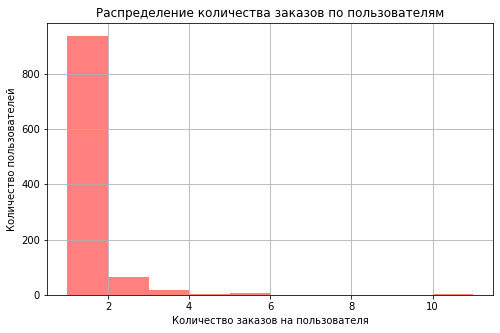

In [56]:
# Построение гистограммы
plt.figure(figsize=(8, 5))

orders_by_users['transaction_id'].hist(color = cmap(.5))
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов на пользователя')         
plt.ylabel('Количество пользователей')
plt.show()

Большая часть пользователей заказывали 1 раз, при этом есть на графики видно явное наличие выбросов.

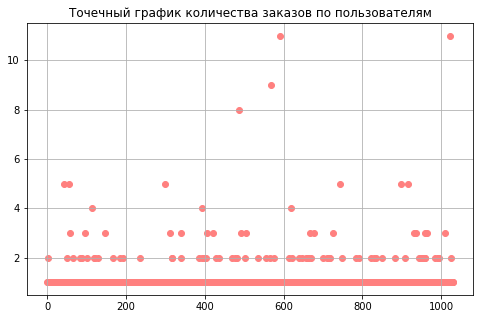

In [57]:
# Построение точечного графика
plt.figure(figsize=(8, 5))
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['transaction_id'], color = cmap(.5)) 

plt.title('Точечный график количества заказов по пользователям')
plt.grid()
plt.show()

Записи по пользователям, совершившим более 6 заказов очень похожи на выбросы.   
Проверим выборочные 95 и 99 перцентили количества заказов на одного пользователя.

In [58]:
np.percentile(orders_by_users['transaction_id'], [95, 99])

array([2., 4.])

**Вывод:** выберем нижней границей **3 заказа**, все остальное будем считать аномалией (составляют не более 1%).

#### Распределение стоимостей заказов 

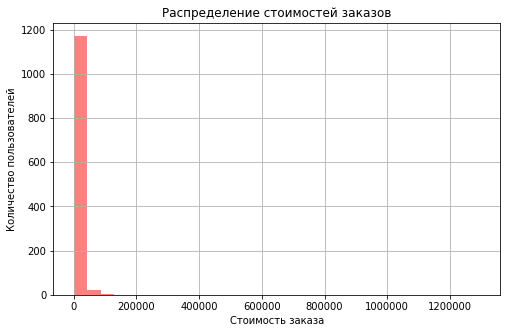

In [59]:
# Построение гистограммы
plt.figure(figsize=(8, 5))

orders['revenue'].hist(bins = 30, color = cmap(.5))

plt.title('Распределение стоимостей заказов')
plt.xlabel('Стоимость заказа')         
plt.ylabel('Количество пользователей')
plt.show()

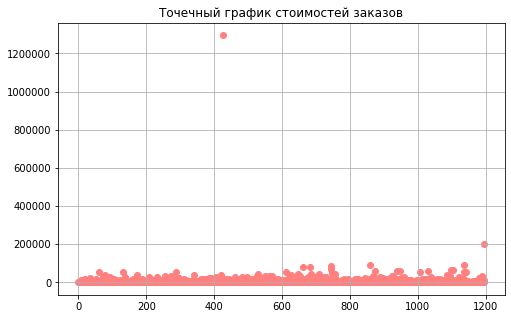

In [60]:
# Построение точечного графика
plt.figure(figsize=(8, 5))
x_values = pd.Series(range(0,len(orders)))

plt.scatter(x_values, orders['revenue'], color = cmap(.5)) 

plt.title('Точечный график стоимостей заказов')
plt.grid()
plt.show()

На графиках виден очень большой выброс, который может существенно повлиять на результаты при проверке гипотез.  
Проверим выборочные 95 и 99 перцентили стоимости заказов.

In [61]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** выберем нижней границей заказы стоимостью **60 000**, заказы большей стоимостю будем считать аномалией (составляют не более 1%).

<a id='step2.4'></a>
### Проверка гипотез по "сырым" данным

In [62]:
# Критический уровень статистической значимости для всех гипотез
alpha = .05

#### Подготовка данных

In [63]:
# Подсчет количества заказов по пользователям в группе А
orders_by_users_A = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})

In [64]:
orders_by_users_A.sample(2)

,visitor_id,transaction_id
263,2303470071,1
186,1602967004,1


In [65]:
# Подсчет количества заказов по пользователям в группе B
orders_by_users_B = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})

In [66]:
orders_by_users_B.sample(2)

,visitor_id,transaction_id
395,2868887864,1
3,39475350,1


In [67]:
# Длина выборки пользователей группы А с заказами
len(orders_by_users_A)

503

In [68]:
# Длина выборки пользователей группы А без заказов
group_data_A['visitors_per_date_A'].sum() - len(orders_by_users_A)

18233

In [69]:
# Генерация выборки с поведением пользователей (кол-во оформленных заказов) среди всех пользователей группы А
sample_A = pd.concat([orders_by_users_A['transaction_id'],
                     pd.Series(0, 
                               index = np.arange(group_data_A['visitors_per_date_A'].sum() - len(orders_by_users_A)), 
                               name='orders')], axis=0)


In [70]:
# Длина получившейся выборки группы A
len(sample_A)

18736

In [71]:
# Длина выборки пользователей группы B с заказами
len(orders_by_users_B)

586

In [72]:
# Длина выборки пользователей группы B без заказов
group_data_B['visitors_per_date_B'].sum() - len(orders_by_users_B)

18330

In [73]:
# Генерация выборки с поведением пользователей (кол-во оформленных заказов) среди всех пользователей группы B
sample_B = pd.concat([orders_by_users_B['transaction_id'],
                     pd.Series(0, 
                               index = np.arange(group_data_B['visitors_per_date_B'].sum() - len(orders_by_users_B)), 
                               name='orders')], axis=0)

In [74]:
# Длина получившейся выборки группы A
len(sample_B)

18916

#### Гипотеза о равенстве конверсий в группах

**Гипотезы:**  
**H0**: Разница в конверсии между группами A и B по «сырым» данным статистически не значима  
**H1**: Разница в конверсии между группами A и B по «сырым» данным статистически значима

In [75]:
# Проверка гипотезы о наличии статистической значимости различий в конверсии между группами по «сырым» данным
results = st.mannwhitneyu(sample_A, sample_B)
    
print('P-value:', round(results[1], 4))

if (results[1] < alpha):
    print('Отвергаем нулевую гипотезу. Разница в конверсиях на "сырых" данных статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о статистической разнице в конверсиях сделать нельзя') 

P-value: 0.0084
Отвергаем нулевую гипотезу. Разница в конверсиях на "сырых" данных статистически значима


#### Гипотеза о равенстве среднего чека в группах

**Гипотезы:**  
**H0**: Разница в среднем чеке между группами A и B по «сырым» данным статистически не значима  
**H1**: Разница в среднем чеке между группами A и B по «сырым» данным статистически значима

In [76]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
    
print('P-value:', round(results[1], 4))

if (results[1] < alpha):
    print('Отвергаем нулевую гипотезу. Разница в среднем чеке на "сырых" данных статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о статистической разнице в среднем чеке сделать нельзя') 

P-value: 0.3646
Не получилось отвергнуть нулевую гипотезу, вывод о статистической разнице в среднем чеке сделать нельзя


<a id='step2.5'></a>
### Проверка гипотез по "очищенным" данным

#### Подготовка данных

Аномальными пользователями были приняты пользователи, совершившие **более 3 заказов**, а также совершившие заказы на сумму **от 60 000**. Сделаем выборки без учета аномальных пользователей.

In [77]:
# ID пользователей, совершивших больше 3 заказов
users_with_many_orders = orders_by_users[orders_by_users['transaction_id'] > 3]

In [78]:
# ID пользователей, совершивших заказы на сумму более 60 000
users_with_expensive_orders = orders[orders['revenue'] > 60000]['visitor_id']

In [79]:
# Все аномальные пользователи
abnormal_users = users_with_many_orders.merge(users_with_expensive_orders, on = 'visitor_id', how = 'outer')

In [80]:
# Удаление дубликатов
abnormal_users = abnormal_users['visitor_id'].drop_duplicates()

In [81]:
abnormal_users

0      199603092
1      237748145
2      457167155
3     1230306981
4     1614305549
5     2038680547
6     2378935119
7     2458001652
8     2587333274
9     3062433592
10    3717692402
11    3803269165
12    4256040402
13    1920142716
14    4266935830
16    4133034833
17     888512513
18    1316129916
19     887908475
20     148427295
21    1164614297
22    1307669133
23    2108080724
Name: visitor_id, dtype: int64

In [82]:
# Генерация выборки с поведением пользователей среди пользователей группы А без учета аномальных пользователей
filtered_sample_A = pd.concat([orders_by_users_A[~orders_by_users_A['visitor_id'].isin(abnormal_users)]['transaction_id'],
                               pd.Series(0, 
                                         index = np.arange(group_data_A['visitors_per_date_A'].sum() - len(orders_by_users_A)),
                                         name='orders')], axis=0)

In [83]:
# Генерация выборки с поведением пользователей среди пользователей группы B без учета аномальных пользователей
filtered_sample_B = pd.concat([orders_by_users_B[~orders_by_users_B['visitor_id'].isin(abnormal_users)]['transaction_id'],
                               pd.Series(0, 
                                         index = np.arange(group_data_B['visitors_per_date_B'].sum() - len(orders_by_users_B)),
                                         name='orders')], axis=0)

#### Гипотеза о равенстве конверсий в группах

**Гипотезы:**  
**H0**: Разница в конверсии между группами A и B по «очищенным» данным статистически не значима  
**H1**: Разница в конверсии между группами A и B по «очищенным» данным статистически значима

In [84]:
# Проверка гипотезы о наличии статистической значимости различий в конверсии между группами по «очищенным» данным
results = st.mannwhitneyu(filtered_sample_A, filtered_sample_B)
    
print('P-value:', round(results[1], 4))

if (results[1] < alpha):
    print('Отвергаем нулевую гипотезу. Разница в конверсиях на "очищенных" данных статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о статистической разнице в конверсиях сделать нельзя') 

P-value: 0.0062
Отвергаем нулевую гипотезу. Разница в конверсиях на "очищенных" данных статистически значима


#### Гипотеза о равенстве среднего чека в группах

**Гипотезы:**  
**H0**: Разница в среднем чеке между группами A и B по «очищенным» данным статистически не значима  
**H1**: Разница в среднем чеке между группами A и B по «очищенным» данным статистически значима

In [85]:
results = st.mannwhitneyu(orders[(orders['group']=='A') & 
                                (~orders['visitor_id'].isin(abnormal_users))]['revenue'], 
                          orders[(orders['group']=='B') & 
                                (~orders['visitor_id'].isin(abnormal_users))]['revenue'])
    
print('P-value:', round(results[1], 4))

if (results[1] < alpha):
    print('Отвергаем нулевую гипотезу. Разница в среднем чеке на "очищенных" данных статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о статистической разнице в среднем чеке сделать нельзя') 

P-value: 0.4718
Не получилось отвергнуть нулевую гипотезу, вывод о статистической разнице в среднем чеке сделать нельзя


<a id='step2.6'></a>
### Вывод

* **Обнаружено** статистически значимое различие **по конверсии** между группами A и B как по "сырым" данным, так и по "очищенным" от аномалий данным.
* Статистически значимых различий **по среднему чеку** **не обнаружено** между группами A и B как по "сырым" данным, так и по "очищенным" от аномалий данным.

**ИТОГО**:    

Можно отметить, что конверсия в группе B выше, чем конверсия в группе А (согласно графикам кумулятивных конверсий, а также проведенному стат.тесту), что нельзя сказать о среднем чеке.  

Можно зафиксировать успех проведенного AB теста по отношению к конверсии.  
Что касается среднего чека - необходимо продумать другие способы повышения данного показателя.

